<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/MinMaxScaler(Normalisation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/wine_data.csv',header=None , usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

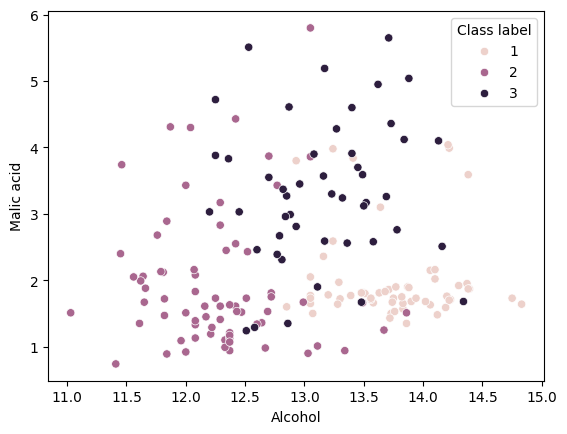

In [ ]:
sns.scatterplot(data=df ,x='Alcohol', y='Malic acid',hue='Class label')

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df.drop('Class label',axis=1 ),df['Class label'],random_state=0,test_size=0.2)

x_train

,Alcohol,Malic acid
161,13.69,3.26
92,12.69,1.53
94,11.62,1.99
174,13.40,3.91
24,13.50,1.81
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [ ]:
y_train

,Class label
70,2
79,2
112,2
119,2
67,2
...,...
176,3
29,1
120,2
53,1


In [ ]:
x_test

,Alcohol,Malic acid
54,13.74,1.67
151,12.79,2.67
63,12.37,1.13
55,13.56,1.73
123,13.05,5.80
121,11.56,2.05
7,14.06,2.15
160,12.36,3.83
106,12.25,1.73
90,12.08,1.83


In [ ]:
y_test

,Class label
54,1
151,3
63,2
55,1
123,2
121,2
7,1
160,3
106,2
90,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 1, 2])

In [ ]:
y_pred_scaled=lr_scaled.predict(x_test_scaled)
y_pred_scaled

array([1, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7222222222222222

In [ ]:
accuracy_score(y_test,y_pred_scaled)

0.75

<ipython-input-96-4283ef193299>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred , hist =False)
<ipython-input-96-4283ef193299>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_scaled , hist =False)


<Axes: ylabel='Density'>

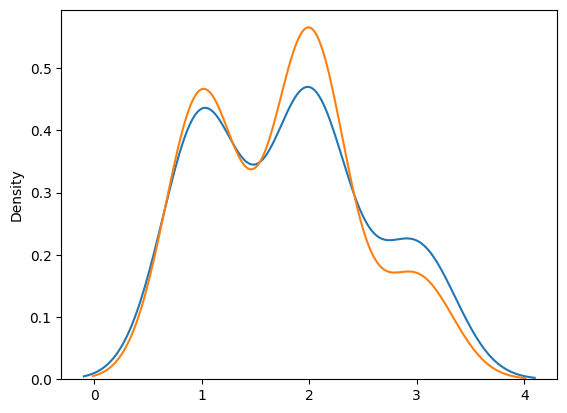

In [ ]:
sns.distplot(y_pred , hist =False)
sns.distplot(y_pred_scaled , hist =False)

In [ ]:
sns.distplot(y_pred_scaled , hist =False)